<a href="https://colab.research.google.com/github/AashRoxx/Data_science_projects/blob/main/Body_fat/Body_Fat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("bodyfat.csv")
x = df.drop(columns = ['BodyFat']).copy()
y = df['BodyFat']

In [ ]:
x_train ,x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.15,random_state=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
lr=[1,0.3,0.1,0.1,0.01,0.03,0.001,0.0001,0.000001]
activation=['relu','sigmoid']
epochs=[10,20,30,40]
hidden=[[128,0,0],[128,64,0],[128,64,32]]
i_dict={}
j_dict={}
k_dict={}
l_dict={}

In [ ]:
for i in activation:
      for l1,l2,l3 in hidden:
          model=tf.keras.Sequential()
          model.add(tf.keras.layers.Dense(300,input_shape=[14,],activation=i))
          model.add(tf.keras.layers.Dense(l1,activation=i))
          model.add(tf.keras.layers.Dense(l2,activation=i))
          model.add(tf.keras.layers.Dense(l3,activation=i))
          model.add(tf.keras.layers.Dense(10,activation=i))
          for j in lr:
             model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=j),metrics=[tf.keras.metrics.RootMeanSquaredError()])
             for k in epochs:
               history=model.fit(x_train,y_train,batch_size=20,epochs=k,validation_split=0.15)    
               i_dict[i]=history
               j_dict[j]=history
               k_dict[k]=history
               l_dict[(l1,l2,l3)]=history

Streaming output truncated to the last 5000 lines.
10/10 [==============================] - 1s 33ms/step - loss: 404.5822 - root_mean_squared_error: 20.1142 - val_loss: 417.1172 - val_root_mean_squared_error: 20.4234
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 404.5822 - root_mean_squared_error: 20.1142 - val_loss: 417.1172 - val_root_mean_squared_error: 20.4234
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 404.5821 - root_mean_squared_error: 20.1142 - val_loss: 417.1172 - val_root_mean_squared_error: 20.4234
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 404.5822 - root_mean_squared_error: 20.1142 - val_loss: 417.1172 - val_root_mean_squared_error: 20.4234
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 404.5822 - root_mean_squared_error: 20.1142 - val_loss: 417.1172 - val_root_mean_squared_error: 20.4234
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 404.582

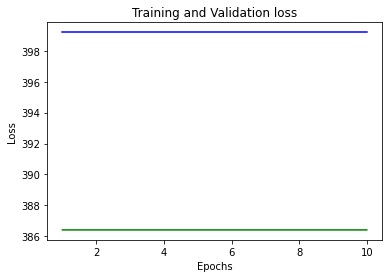

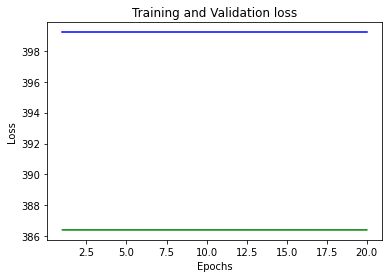

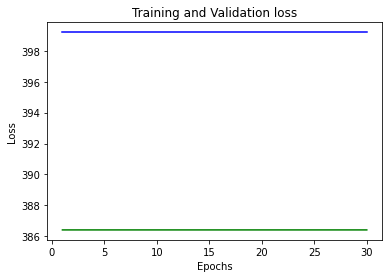

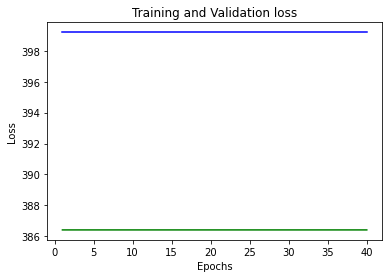

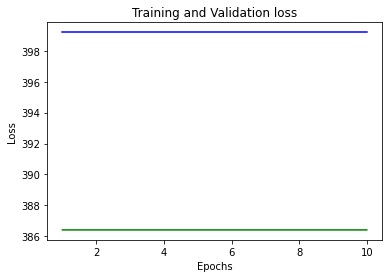

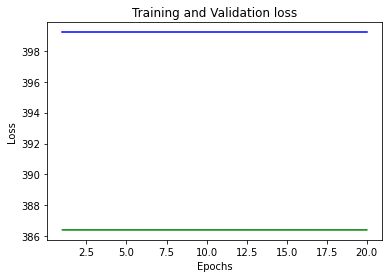

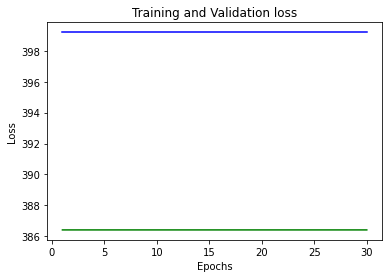

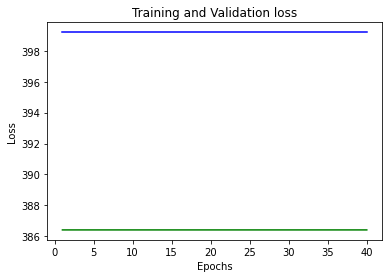

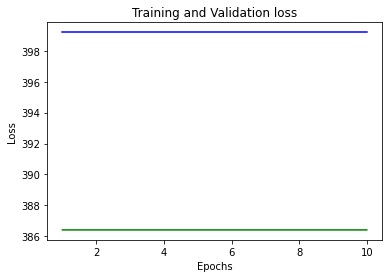

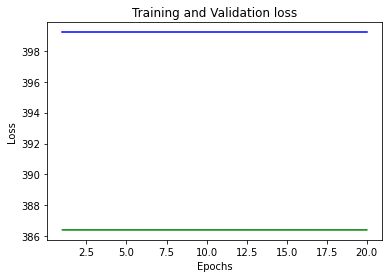

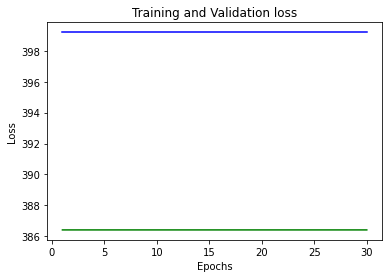

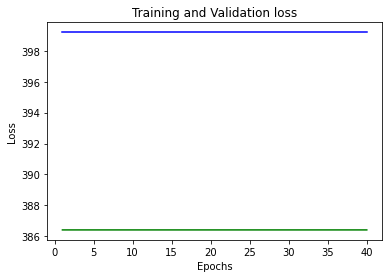

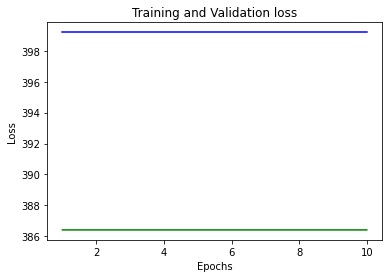

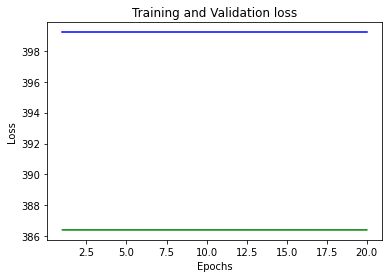

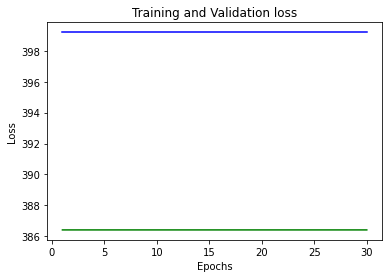

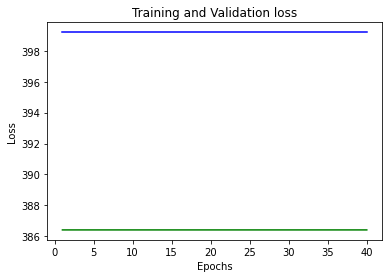

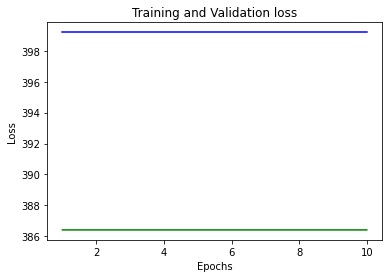

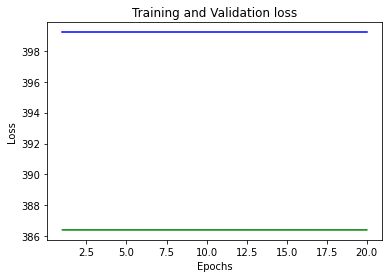

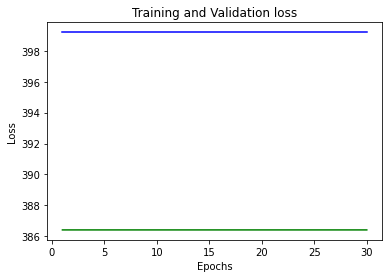

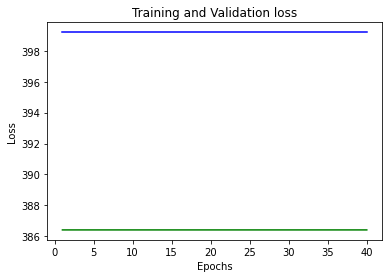

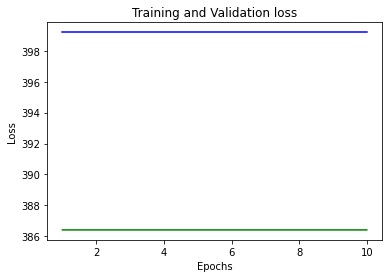

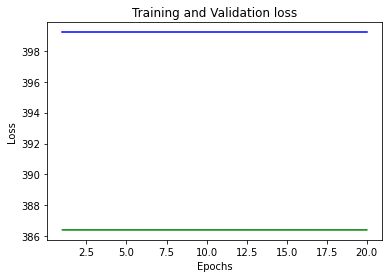

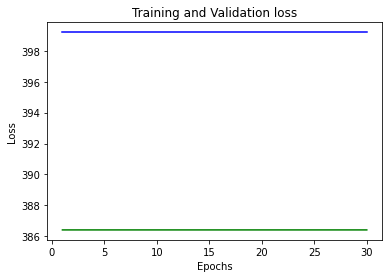

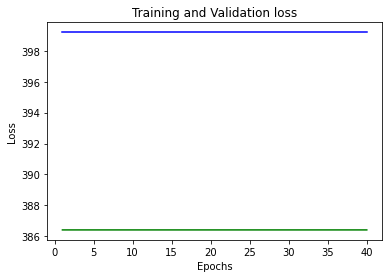

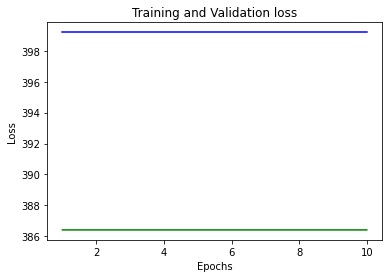

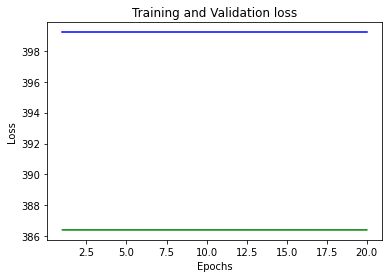

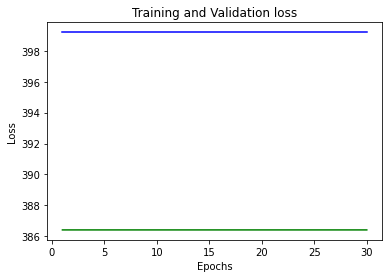

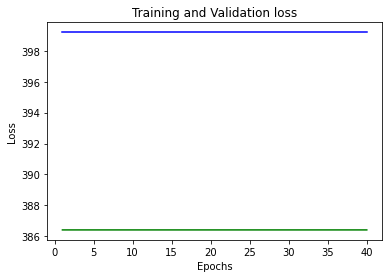

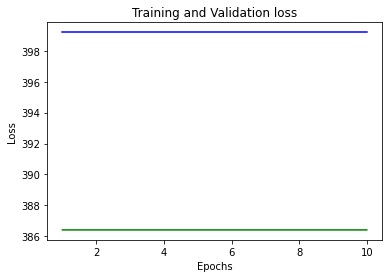

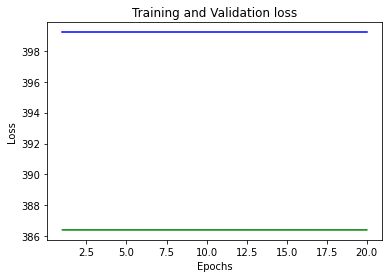

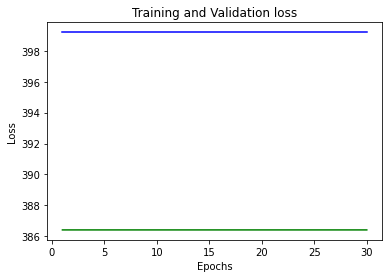

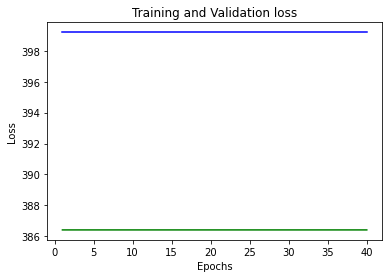

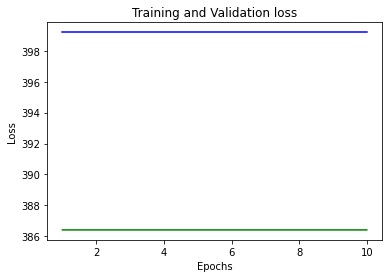

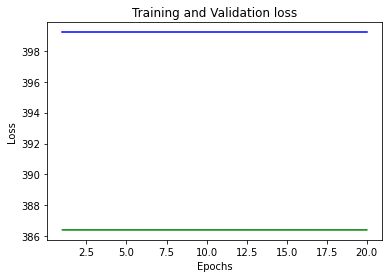

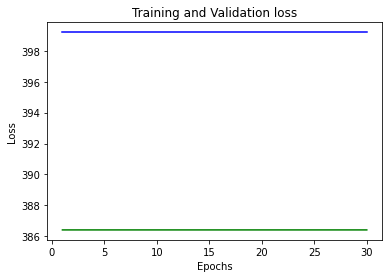

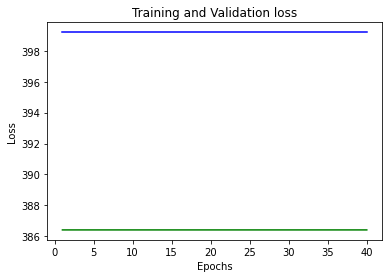

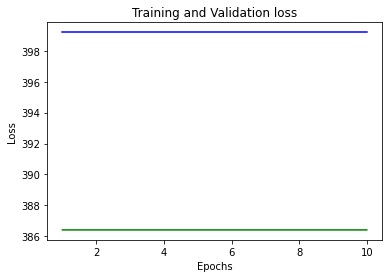

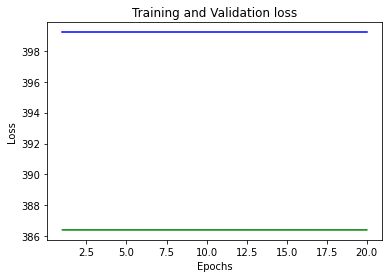

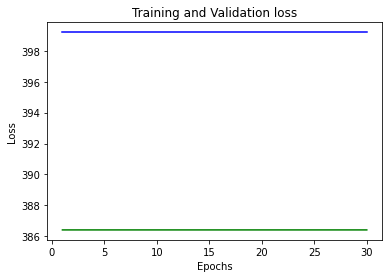

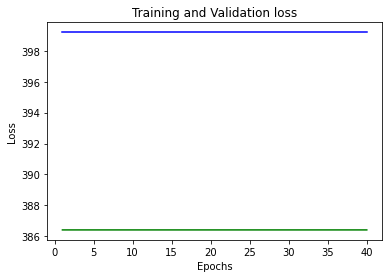

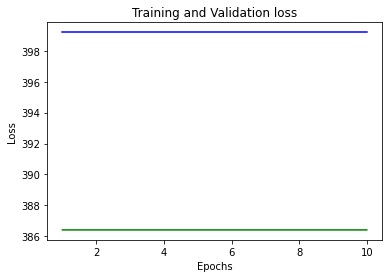

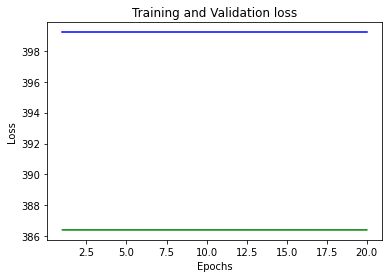

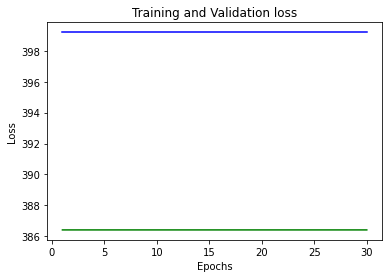

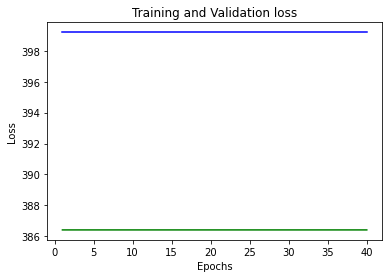

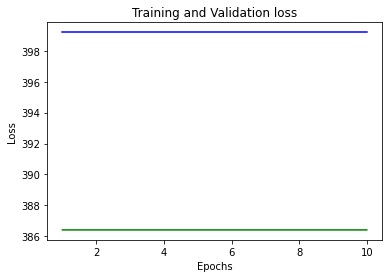

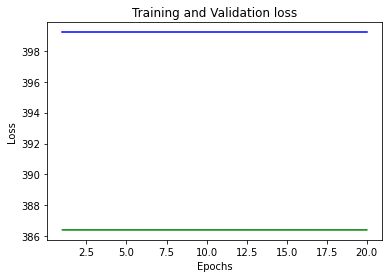

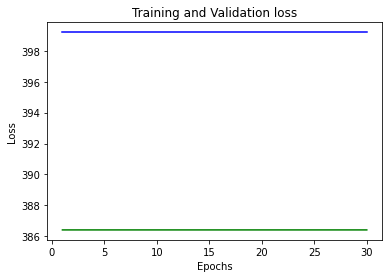

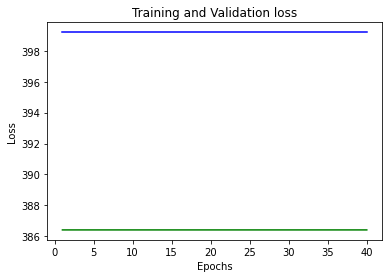

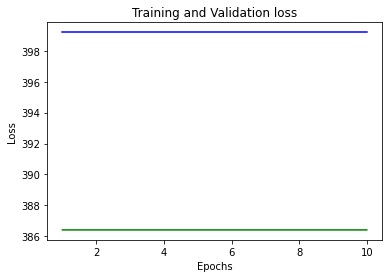

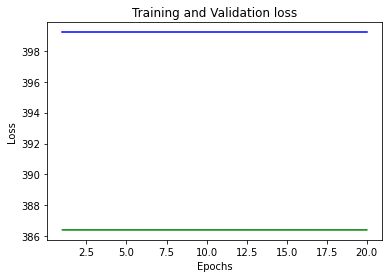

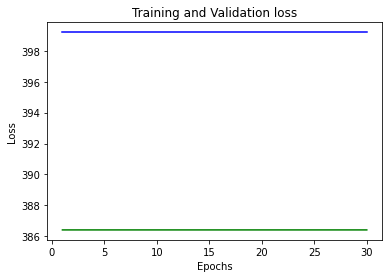

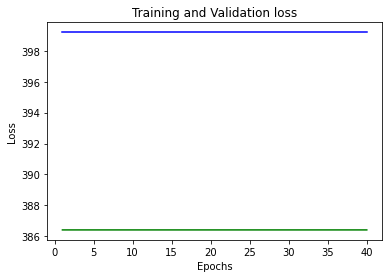

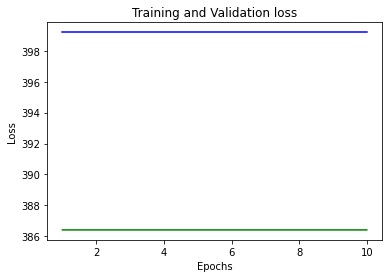

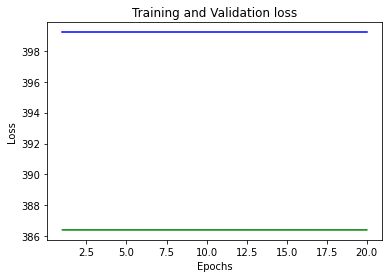

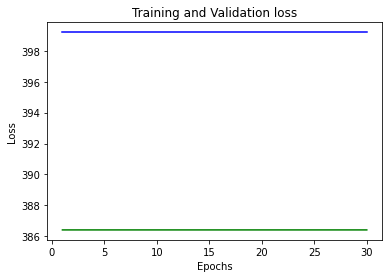

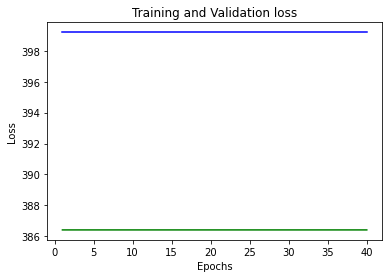

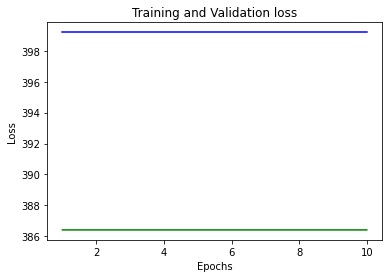

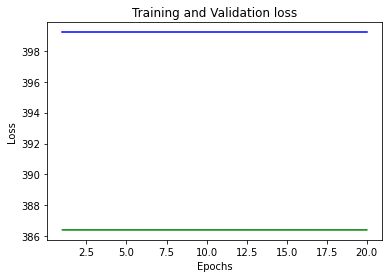

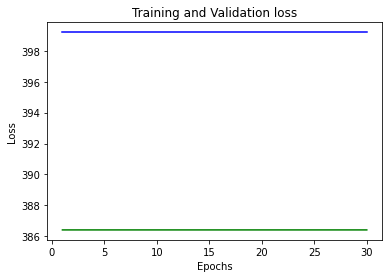

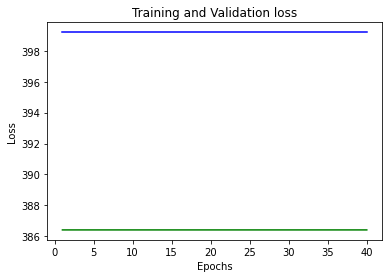

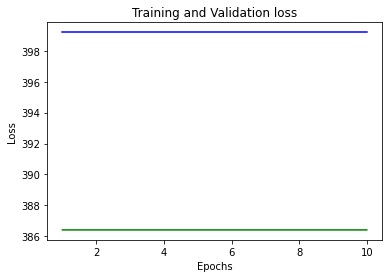

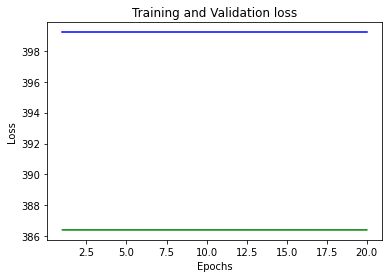

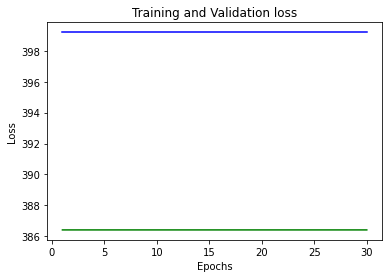

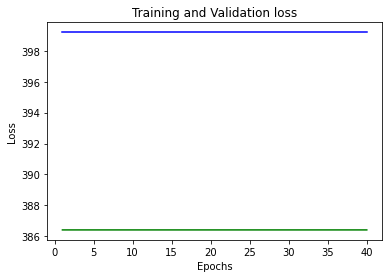

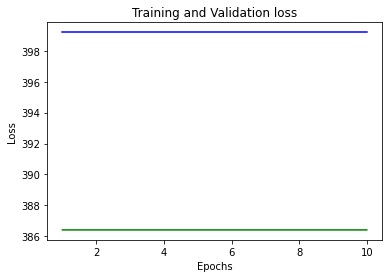

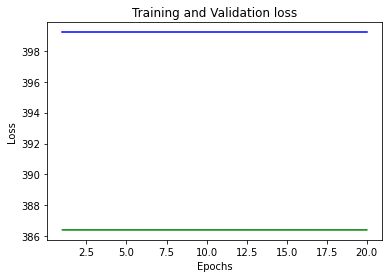

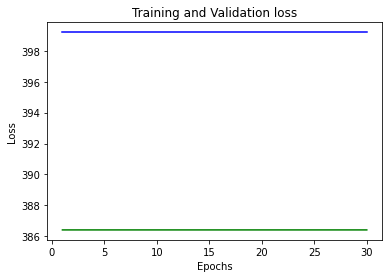

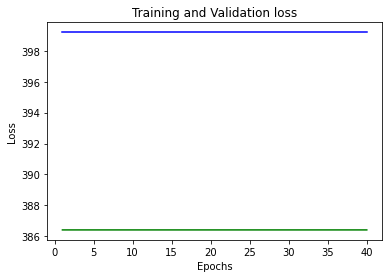

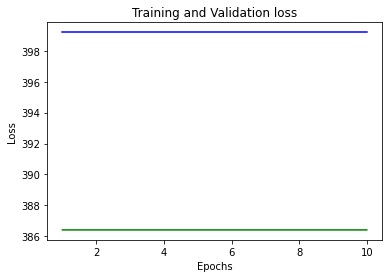

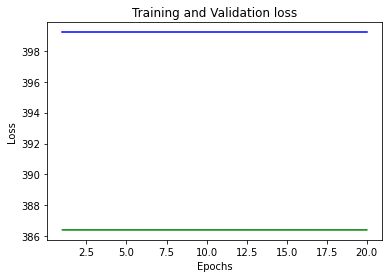

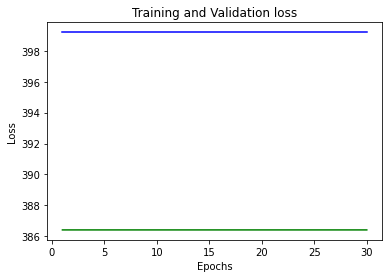

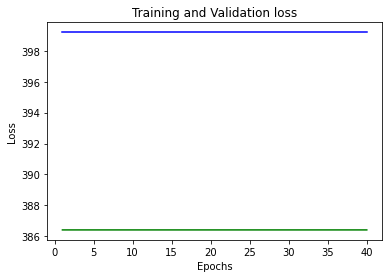

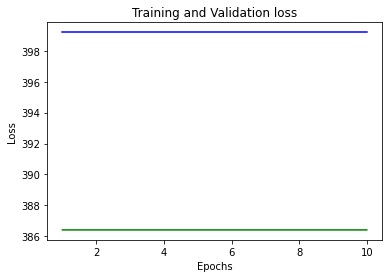

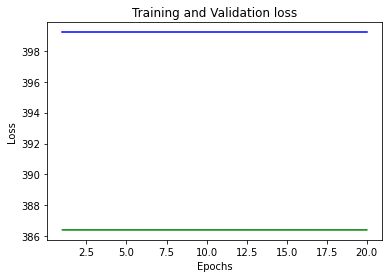

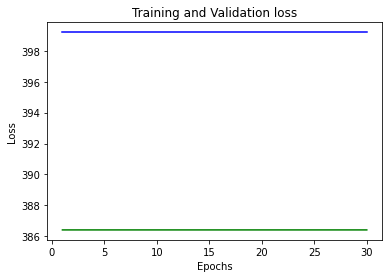

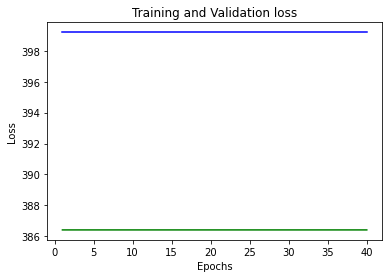

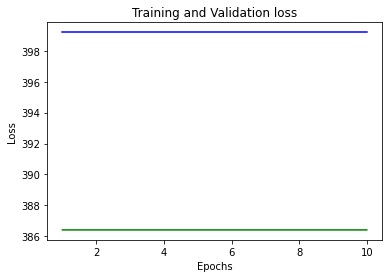

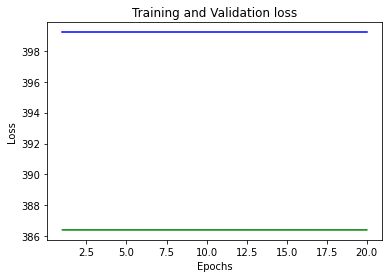

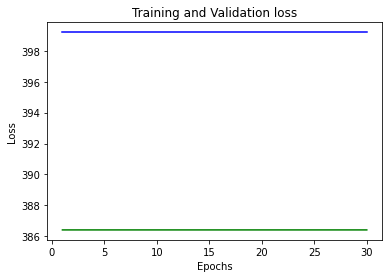

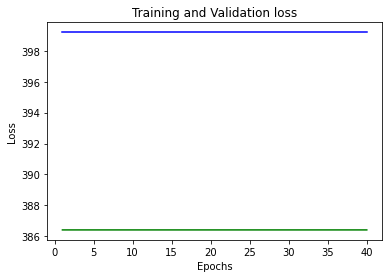

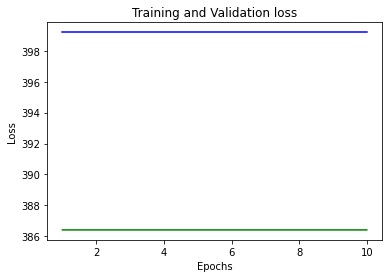

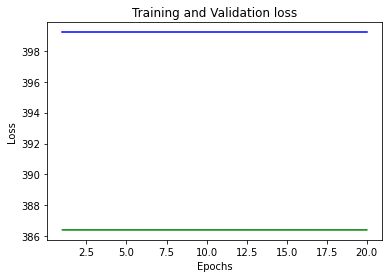

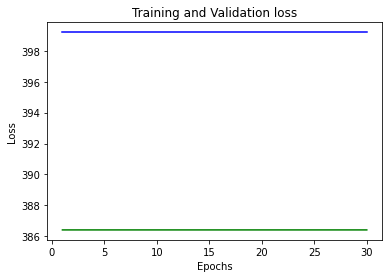

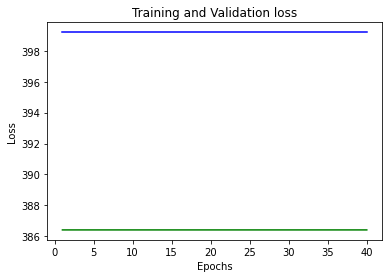

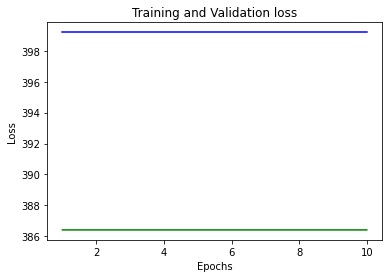

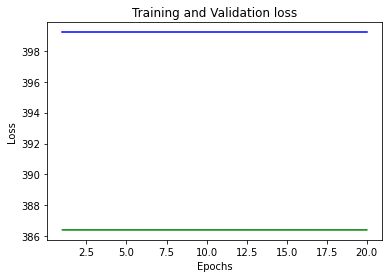

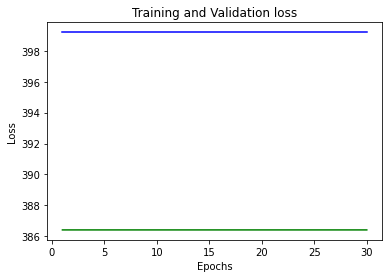

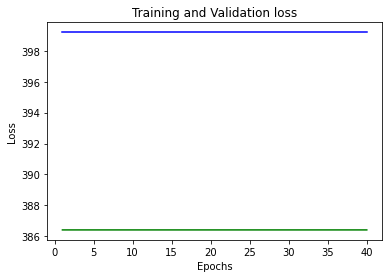

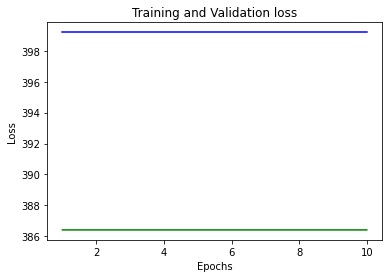

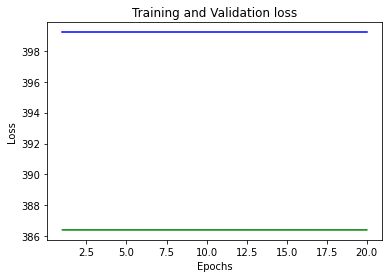

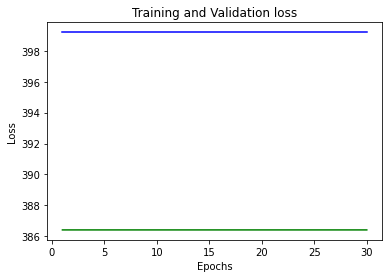

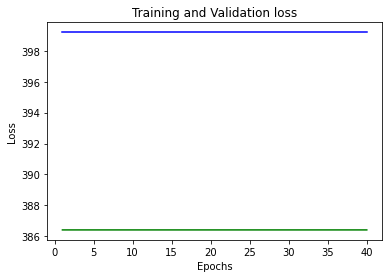

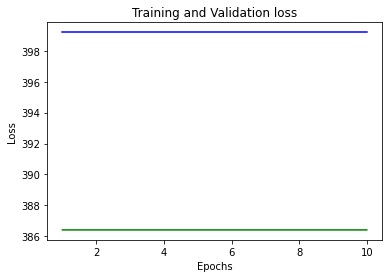

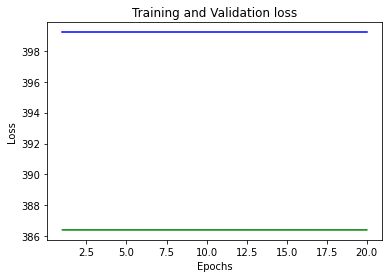

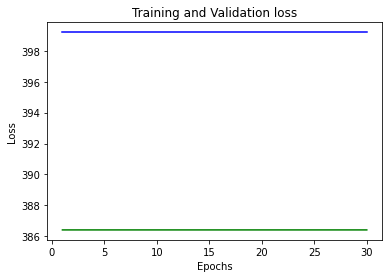

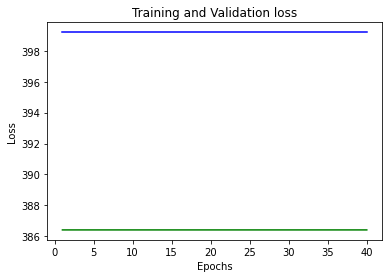

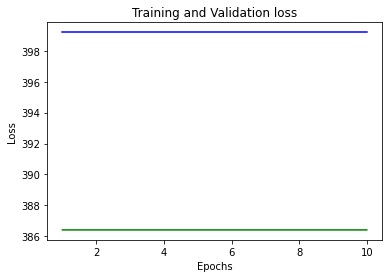

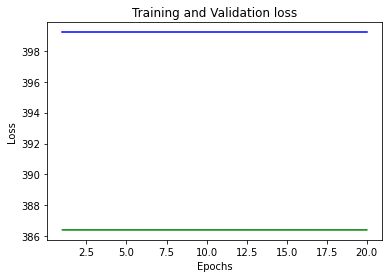

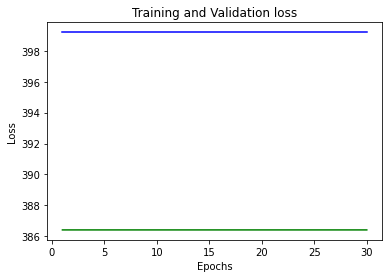

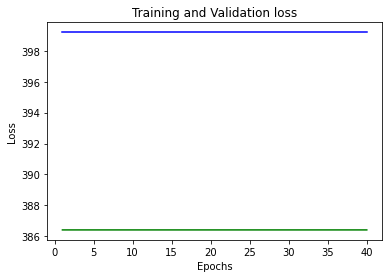

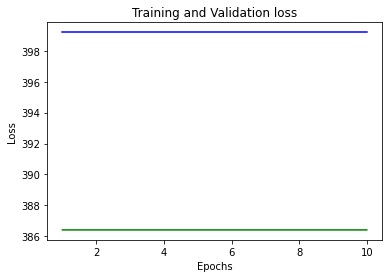

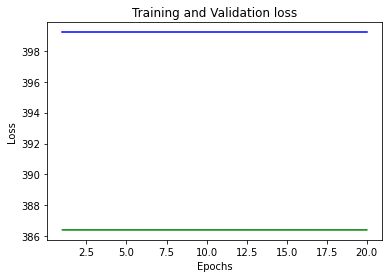

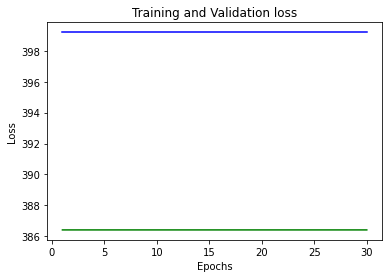

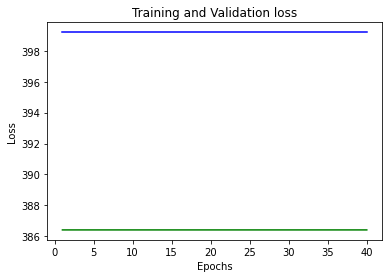

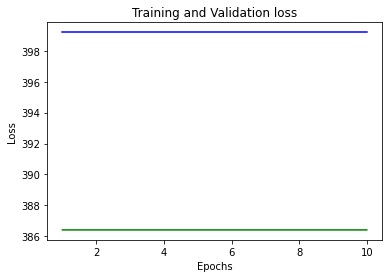

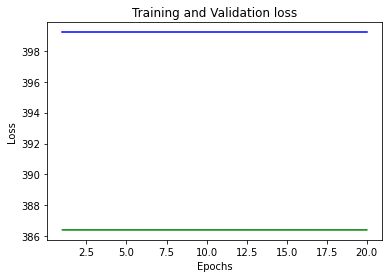

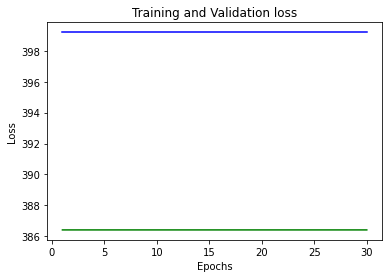

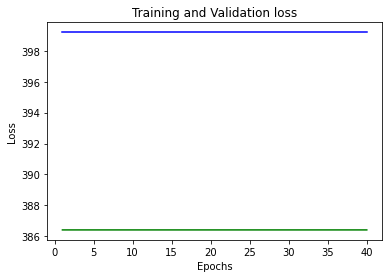

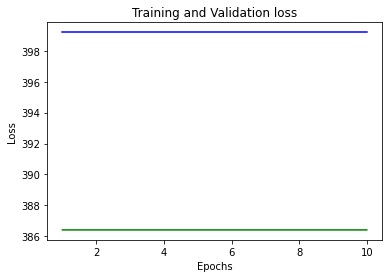

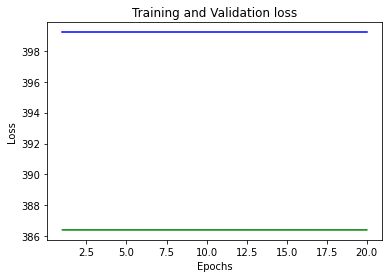

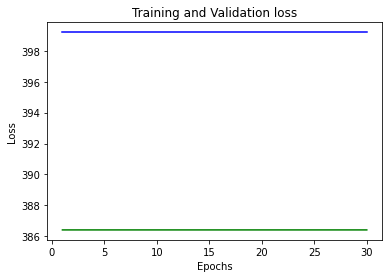

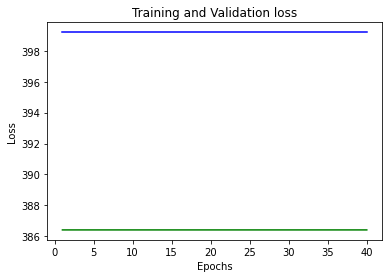

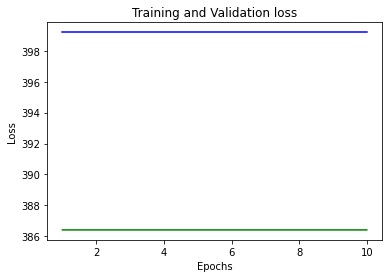

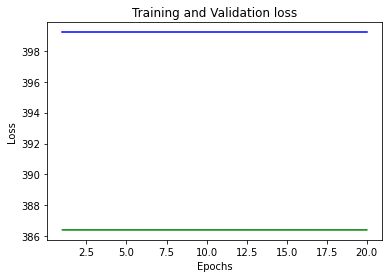

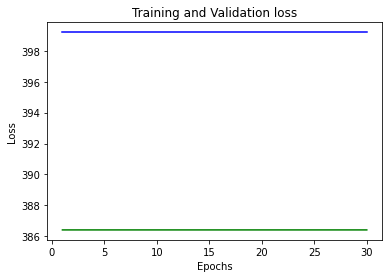

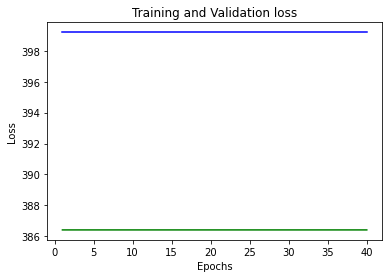

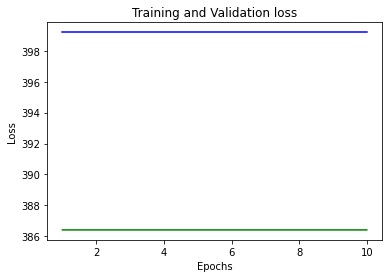

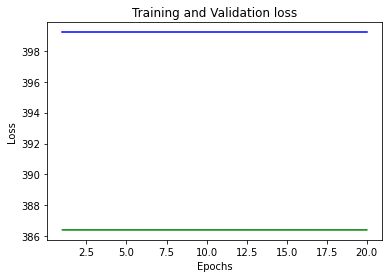

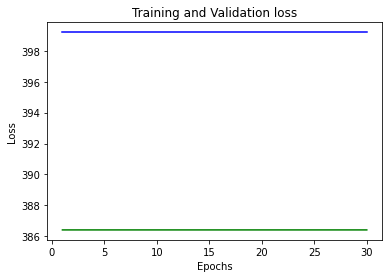

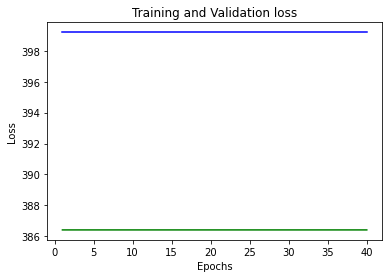

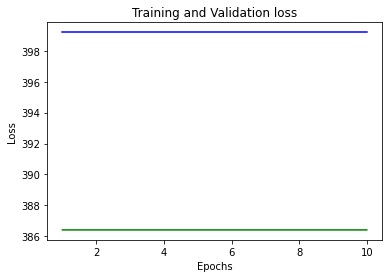

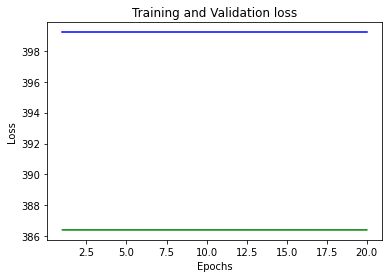

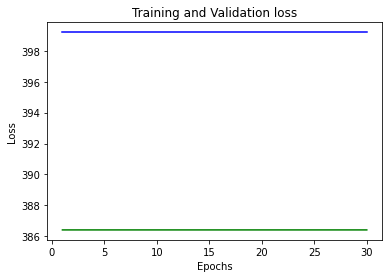

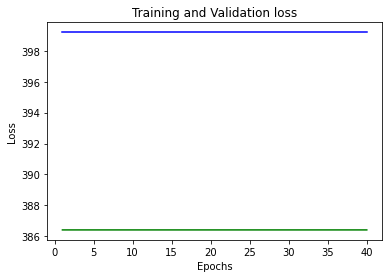

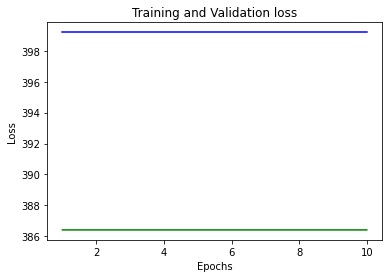

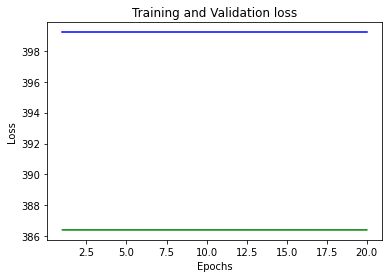

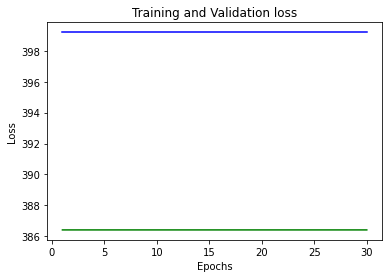

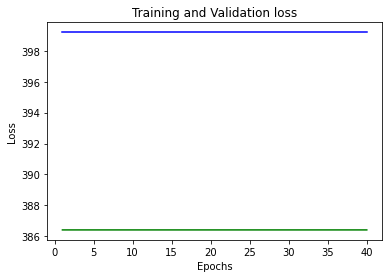

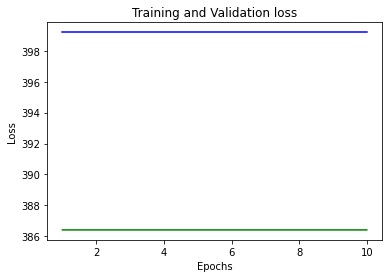

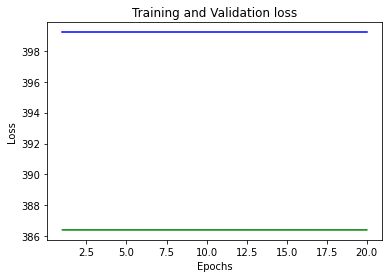

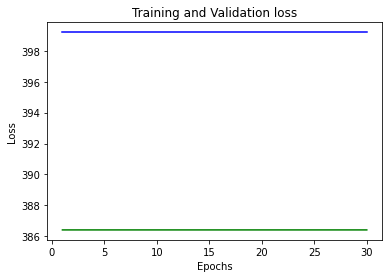

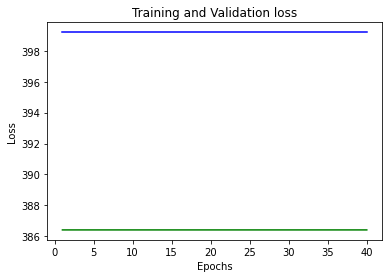

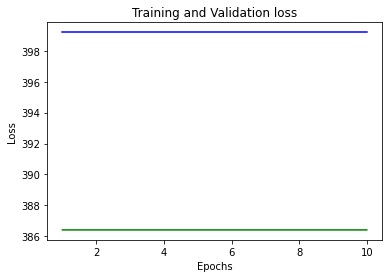

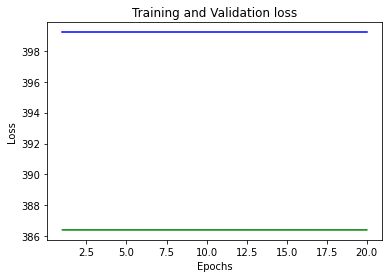

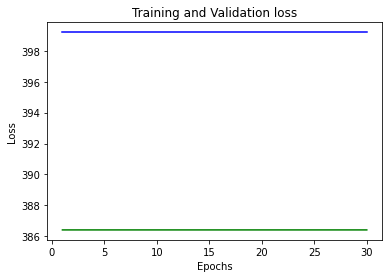

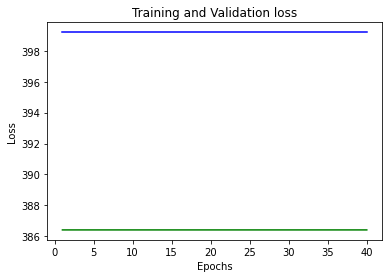

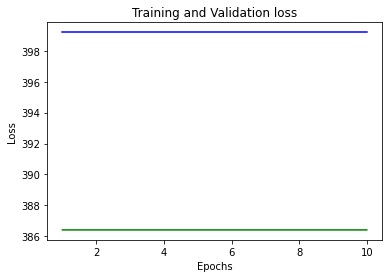

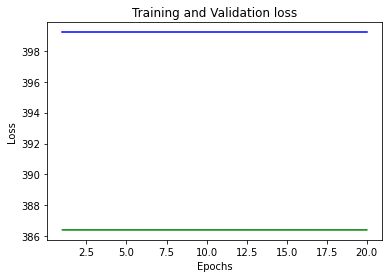

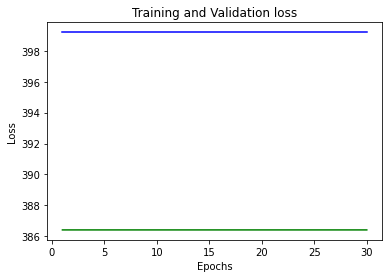

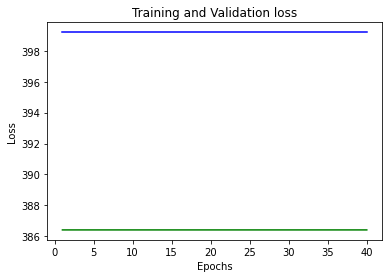

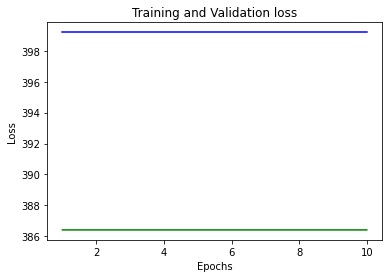

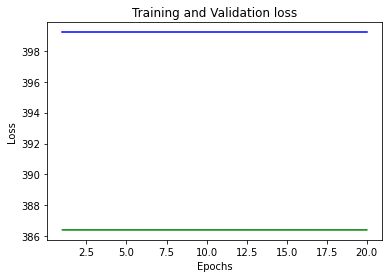

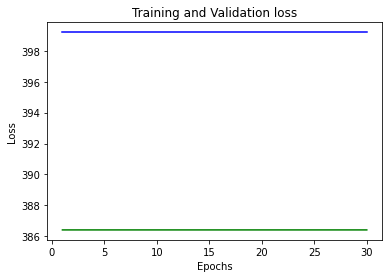

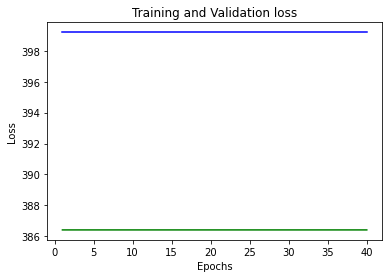

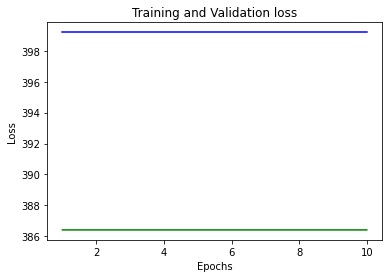

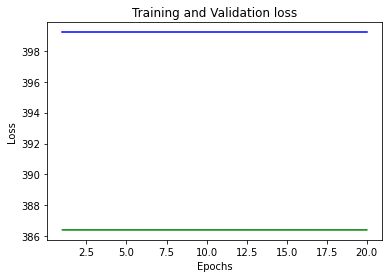

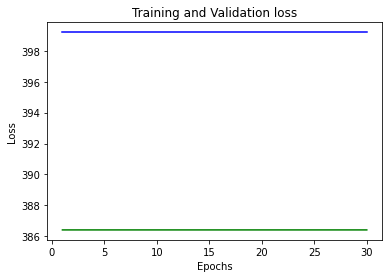

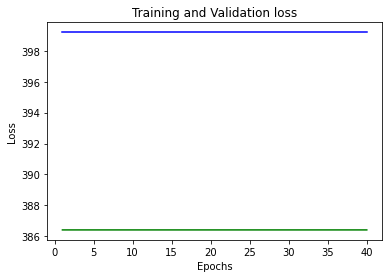

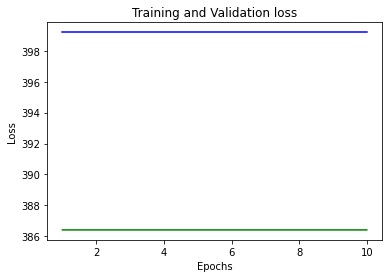

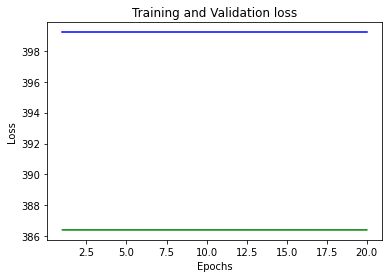

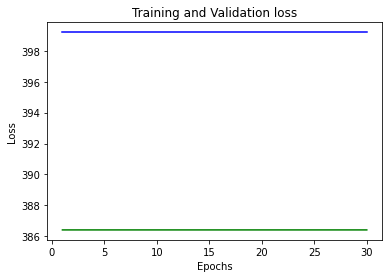

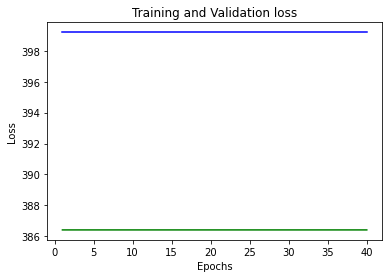

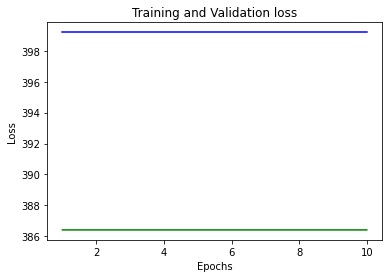

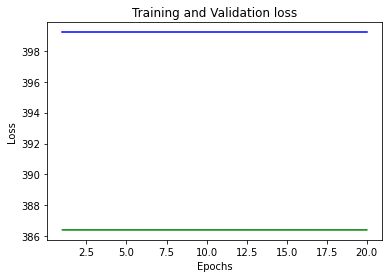

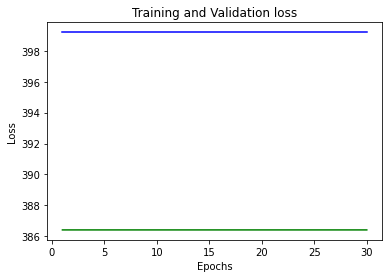

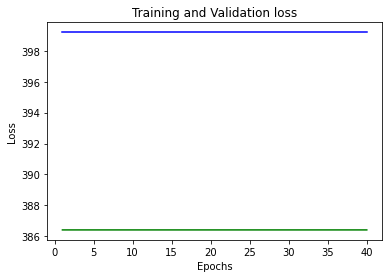

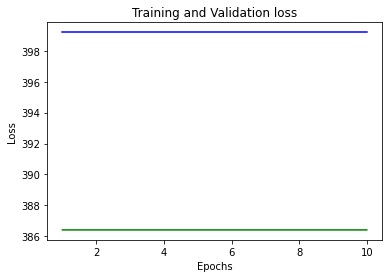

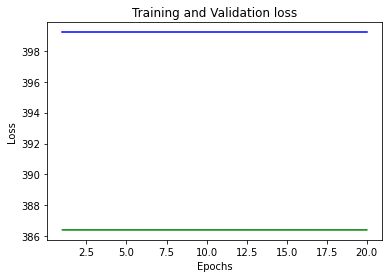

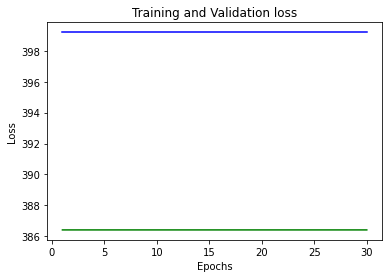

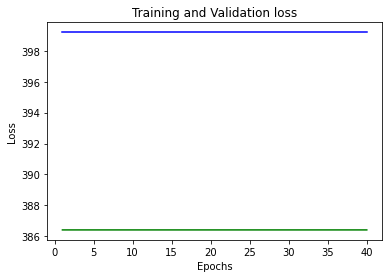

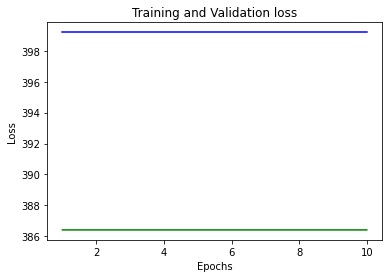

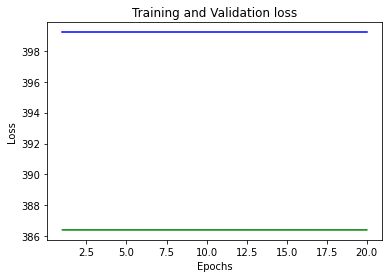

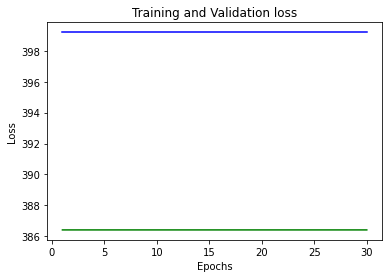

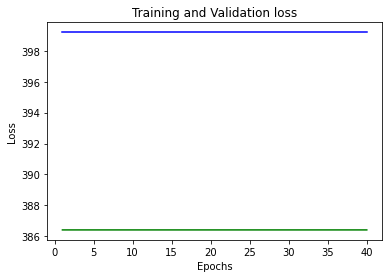

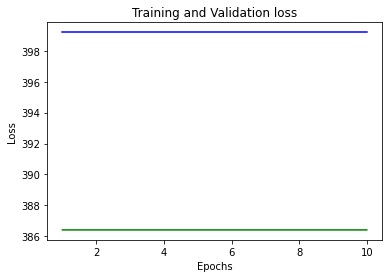

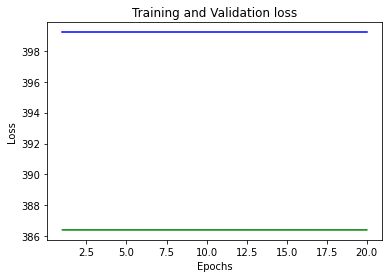

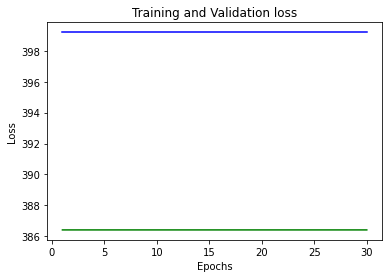

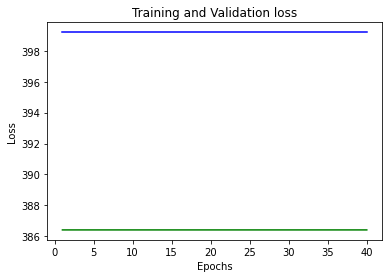

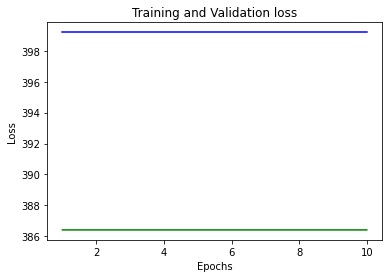

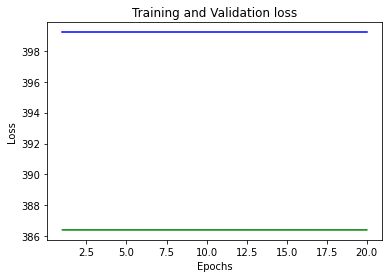

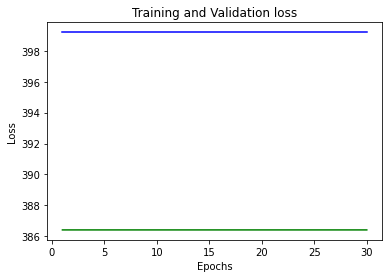

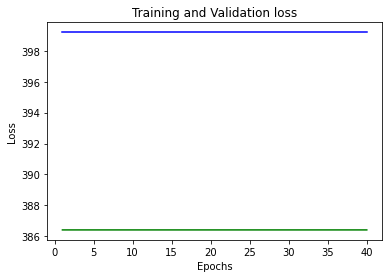

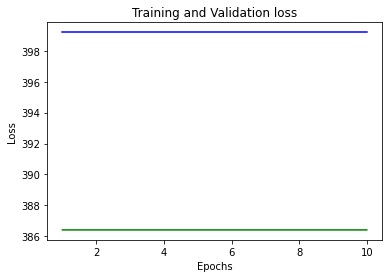

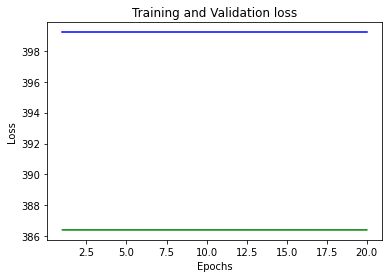

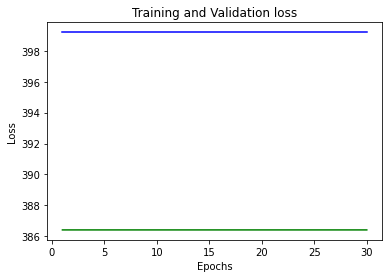

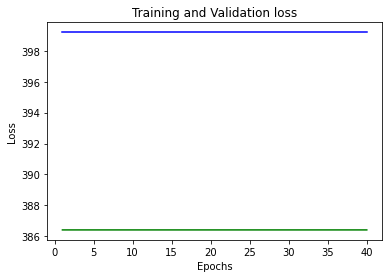

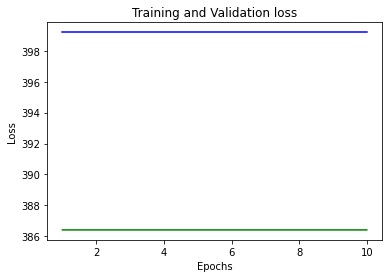

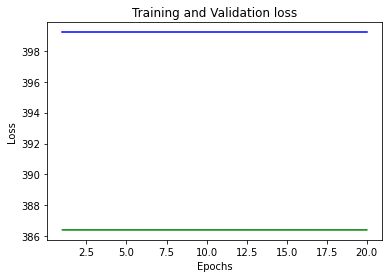

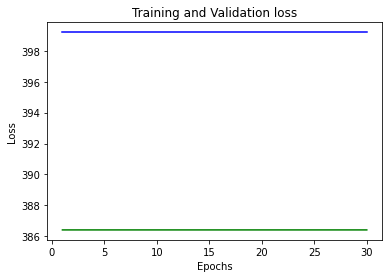

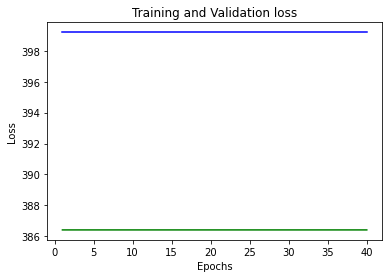

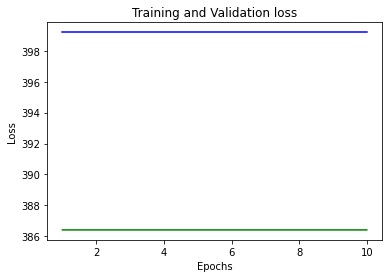

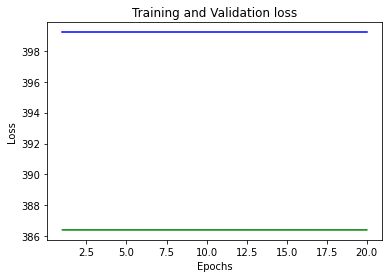

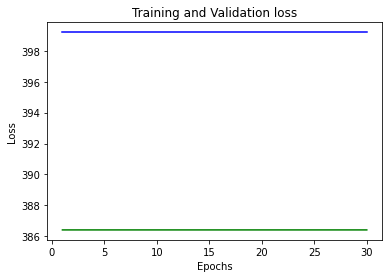

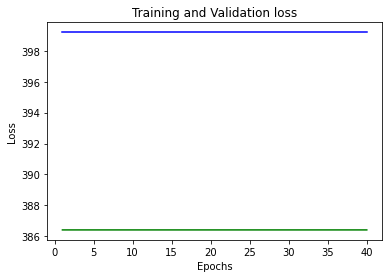

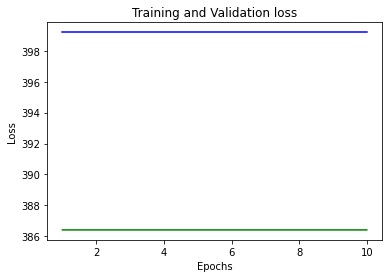

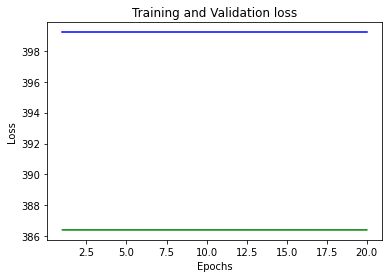

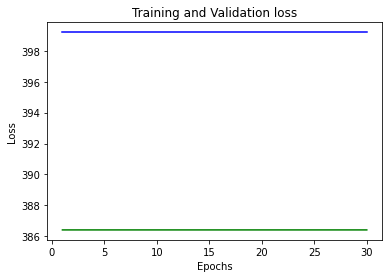

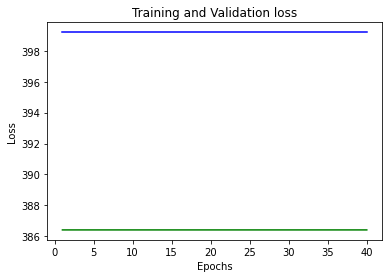

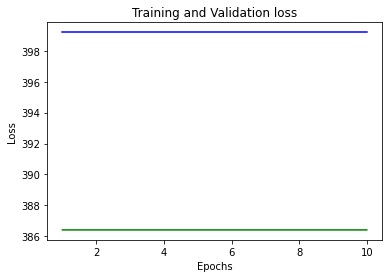

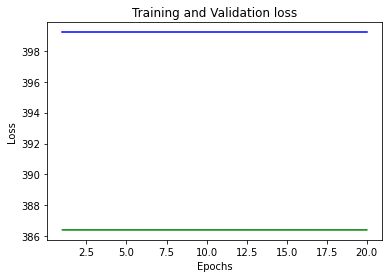

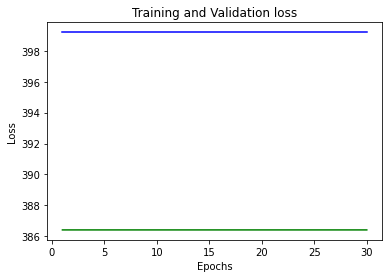

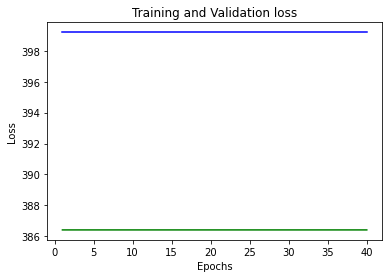

In [ ]:
import matplotlib.pyplot as plt
for key,value in i_dict.items():
  for key2,value2 in l_dict.items():
    for key3,value3 in j_dict.items():
       for key4,value4 in k_dict.items():
             epochs=range(1,key4+1)
             plt.plot(epochs, value4.history['loss'], 'g', label='Training loss')
             plt.plot(epochs, value4.history['val_loss'], 'b', label='validation loss')
             plt.title('Training and Validation loss')
             plt.xlabel('Epochs')
             plt.ylabel('Loss')
             plt.show()